# **Project Phase 2: Model Execution Instructions**

This directory contains the source code for the 6 machine learning and statistical models applied to the NYC Green Taxi dataset for the EAS 587 course project.

## **Requirements**

* A web browser  
* A Google Account (for using Google Colab)

## **Files Included**

* `taxi_data.csv`: The dataset used by all notebooks.  
* `model_1_LinearRegression.ipynb`: Notebook for the Linear Regression model.  
* `model_2_KNN.ipynb`: Notebook for K-Nearest Neighbors and K-Means models.  
* `model_3_DecisionTree.ipynb`: Notebook for the Decision Tree classification model.  
* `model_4_RandomForest.ipynb`: Notebook for the Random Forest regression model.  
* `model_5_DBSCAN.ipynb`: Notebook for the DBSCAN clustering model.  
* `model_6_ARIMA.ipynb`: Notebook for the ARIMA and Prophet time-series models.

## **Step-by-Step Execution Instructions**

To reproduce the results, please follow these steps for each of the 6 notebooks.

1. **Navigate to Google Colab** Open your web browser and go to [https://colab.research.google.com/](https://colab.research.google.com/).  
2. **Upload Project Files** On the left-hand side of the Colab interface, click the **"Files"** icon (it looks like a folder). Click the **"Upload to session storage"** icon and select all the files from this `src/` directory (the 6 `.ipynb` notebooks and `taxi_data.csv`). Wait for all files to finish uploading.  
3. **Open a Notebook** In the file browser on the left, double-click on one of the notebook files (e.g., `LinearRegression.ipynb`) to open it in the main editor.  
4. **Run the Notebook** Once the notebook is open and has connected to a runtime, go to the top menu and select **Runtime \-\> Run all**.  
5. **View Results** The notebook will now execute from the first cell to the last, producing all the model metrics, tables, and visualizations described in the report.  
6. **Repeat for Other Models** Repeat steps 3-5 for the remaining 5 notebook files to see the results for each model. Make sure you upload the `taxi_data.csv` file for every python notebook.

**Important Note on Colab Runtimes:** The files uploaded to a Google Colab session are temporary. If your session disconnects or times out (e.g., after being idle), the uploaded files will be deleted. If this happens, you will need to re-upload the `taxi_data.csv` file (Step 2).



✅ Dataset loaded successfully!
Total rows: 787060
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2     01-01-2023 00:26      01-01-2023 00:37                  N   
1         2     01-01-2023 00:51      01-01-2023 00:57                  N   
2         2     01-01-2023 00:35      01-01-2023 00:41                  N   
3         1     01-01-2023 00:13      01-01-2023 00:19                  N   
4         1     01-01-2023 00:33      01-01-2023 00:39                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  m

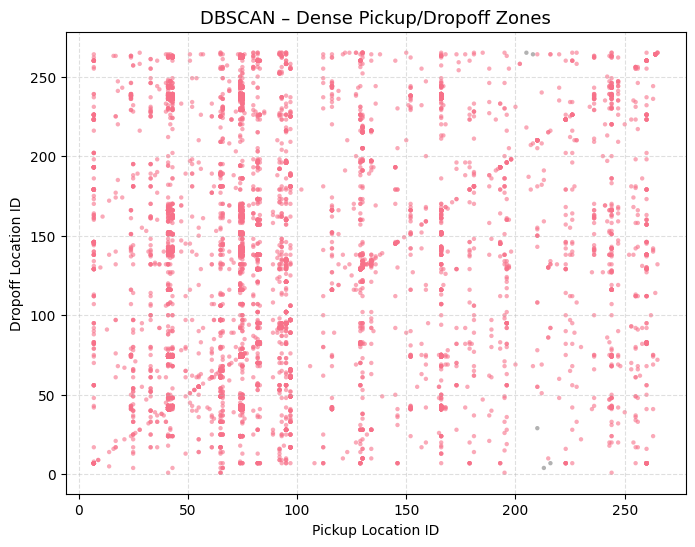

/tmp/ipython-input-3753190200.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


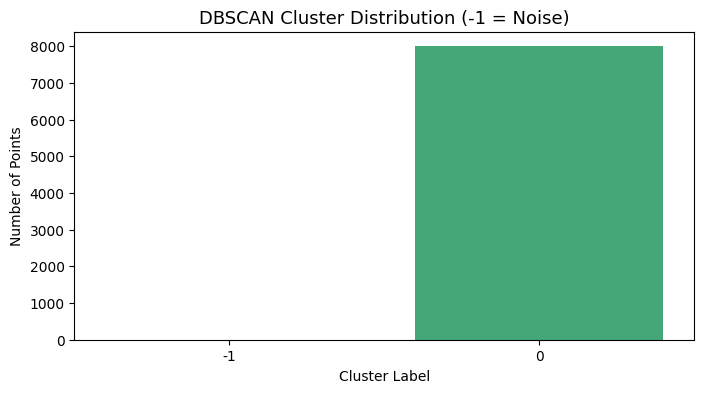


Cluster summary (Top 10):
   Cluster  Count
1        0   7995
0       -1      5

✅ DBSCAN hotspot visualization complete.


In [1]:
# ==========================================================
# STEP 1 — Import required libraries
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ==========================================================
# STEP 2 — Load dataset
# ==========================================================
df = pd.read_csv("taxi_data.csv", low_memory=False)
print("✅ Dataset loaded successfully!")
print(f"Total rows: {len(df)}")
print(df.head())

# ==========================================================
# STEP 3 — Select columns for DBSCAN clustering
# ==========================================================
# Use only the columns related to pickup/dropoff locations
df_db = df[['PULocationID', 'DOLocationID']].dropna()

# Sample down to avoid OOM issues (you can increase if your system allows)
df_sample = df_db.sample(n=8000, random_state=42)

print(f"\nUsing sample of {len(df_sample)} records for clustering")

# ==========================================================
# STEP 4 — Standardize data
# ==========================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# ==========================================================
# STEP 5 — Apply DBSCAN (density-based clustering)
# ==========================================================
dbscan = DBSCAN(eps=0.3, min_samples=20, n_jobs=-1)
labels = dbscan.fit_predict(X_scaled)

df_sample['Cluster'] = labels

# ==========================================================
# STEP 6 — Analyze clusters
# ==========================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\n✅ DBSCAN Results:")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# ==========================================================
# STEP 7 — Visualize dense zones (pickup vs dropoff)
# ==========================================================
plt.figure(figsize=(8, 6))
palette = sns.color_palette("husl", n_clusters)
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]

plt.scatter(
    df_sample['PULocationID'],
    df_sample['DOLocationID'],
    c=colors,
    s=10,
    alpha=0.6,
    edgecolor='none'
)
plt.title("DBSCAN – Dense Pickup/Dropoff Zones", fontsize=13)
plt.xlabel("Pickup Location ID")
plt.ylabel("Dropoff Location ID")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# ==========================================================
# STEP 8 — Cluster size distribution visualization
# ==========================================================
cluster_counts = df_sample['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title("DBSCAN Cluster Distribution (-1 = Noise)", fontsize=13)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.show()

# ==========================================================
# STEP 9 — Display cluster summary statistics
# ==========================================================
summary = df_sample.groupby('Cluster').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print("\nCluster summary (Top 10):")
print(summary.head(10))

print("\n✅ DBSCAN hotspot visualization complete.")
